## Pair Programming Estadística Descriptiva

En este caso usaremos el mismo DataFrame que hemos estado usando en los últimos pairs. El ejercicio que os planteamos es:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, kstest

pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("world-data-2023-leccion06.csv", index_col=0)

df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,continent
0,Afghanistan,60.0,AF,58.1,652.23,323.000000,32.49,93.0,Kabul,8.67,149.9000,2.300000,AFN,4.47,2.1,0.70,104.0,9.700000,47.9,Kabul,64.500000,638.000000,0.43,Pashto,78.4,0.28,38041754.00,48.90,9.300000,71.400000,11.120000,9797273.00,Asia
1,Albania,105.0,AL,43.1,28.75,9.000000,11.78,355.0,Tirana,4.54,119.0500,1.400000,ALL,1.62,28.1,1.36,107.0,55.000000,7.8,Tirana,78.500000,15.000000,1.12,Albanian,56.9,1.20,2854191.00,55.70,18.600000,36.600000,12.330000,1747593.00,Europe
2,Algeria,18.0,DZ,17.4,2381741.00,317.000000,24.28,213.0,Algiers,150.01,151.3600,2.000000,DZD,3.02,0.8,0.28,109.9,51.400000,20.1,Algiers,76.700000,112.000000,0.95,Arabic,28.1,1.72,43053054.00,41.20,37.200000,66.100000,11.700000,31510100.00,Africa
3,Andorra,164.0,AD,40.0,468.00,58627.064327,7.20,376.0,Andorra la Vella,469.00,144.1936,6.722346,EUR,1.27,34.0,1.51,106.4,37.963388,2.7,Andorra la Vella,72.279679,160.392265,6.63,Catalan,36.4,3.33,77.14,62.45,16.573964,40.822404,6.886364,67.87,Europe
4,Angola,26.0,AO,47.5,1246700.00,117.000000,40.73,244.0,Luanda,34.69,261.7300,17.100000,AOA,5.52,46.3,0.97,113.5,9.300000,51.6,Luanda,60.800000,241.000000,0.71,Portuguese,33.4,0.21,31825295.00,77.50,9.200000,49.100000,6.890000,21061025.00,Africa


1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:

- Media.

In [3]:
df_numerico = df.select_dtypes(include=["number"])
df_numerico.head()

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population
0,60.0,58.1,652.23,323.000000,32.49,93.0,8.67,149.9000,2.300000,4.47,2.1,0.70,104.0,9.700000,47.9,64.500000,638.000000,0.43,78.4,0.28,38041754.00,48.90,9.300000,71.400000,11.120000,9797273.00
1,105.0,43.1,28.75,9.000000,11.78,355.0,4.54,119.0500,1.400000,1.62,28.1,1.36,107.0,55.000000,7.8,78.500000,15.000000,1.12,56.9,1.20,2854191.00,55.70,18.600000,36.600000,12.330000,1747593.00
2,18.0,17.4,2381741.00,317.000000,24.28,213.0,150.01,151.3600,2.000000,3.02,0.8,0.28,109.9,51.400000,20.1,76.700000,112.000000,0.95,28.1,1.72,43053054.00,41.20,37.200000,66.100000,11.700000,31510100.00
3,164.0,40.0,468.00,58627.064327,7.20,376.0,469.00,144.1936,6.722346,1.27,34.0,1.51,106.4,37.963388,2.7,72.279679,160.392265,6.63,36.4,3.33,77.14,62.45,16.573964,40.822404,6.886364,67.87
4,26.0,47.5,1246700.00,117.000000,40.73,244.0,34.69,261.7300,17.100000,5.52,46.3,0.97,113.5,9.300000,51.6,60.800000,241.000000,0.71,33.4,0.21,31825295.00,77.50,9.200000,49.100000,6.890000,21061025.00


In [4]:
media = df_numerico.mean().reset_index()
media

,index,0
0,density,1.345045e+02
1,agricultural_land,3.911755e+01
2,land_area,5.235897e+05
3,armed_forces_size,5.862706e+04
4,birth_rate,2.021497e+01
5,calling_code,3.586974e+02
6,co2-emissions,1.035807e+05
7,cpi,1.441936e+02
8,cpi_change,6.722346e+00
9,fertility_rate,2.698138e+00


- Mediana.

In [5]:
mediana = df_numerico.median().reset_index()
mediana

,index,0
0,density,8.300000e+01
1,agricultural_land,3.920000e+01
2,land_area,2.397850e+02
3,armed_forces_size,4.200000e+01
4,birth_rate,1.825000e+01
5,calling_code,2.550000e+02
6,co2-emissions,3.757500e+01
7,cpi,1.297800e+02
8,cpi_change,2.600000e+00
9,fertility_rate,2.270000e+00


- Desviación estándar.

In [6]:
desviacion_estandar = df_numerico.std().reset_index()
desviacion_estandar

,index,0
0,density,1.573068e+02
1,agricultural_land,2.138645e+01
2,land_area,1.947860e+06
3,armed_forces_size,3.366083e+05
4,birth_rate,9.790765e+00
5,calling_code,3.234345e+02
6,co2-emissions,8.215216e+05
7,cpi,5.188329e+01
8,cpi_change,2.342046e+01
9,fertility_rate,1.258921e+00


- Mínimo.

In [7]:
minimo = df_numerico.min().reset_index()
minimo

,index,0
0,density,1.26
1,agricultural_land,0.60
2,land_area,0.00
3,armed_forces_size,0.00
4,birth_rate,5.90
5,calling_code,0.00
6,co2-emissions,1.02
7,cpi,99.03
8,cpi_change,-4.30
9,fertility_rate,0.98


- Máximo.

In [8]:
maximo = df_numerico.max().reset_index()
maximo

,index,0
0,density,8.470000e+02
1,agricultural_land,8.260000e+01
2,land_area,1.709824e+07
3,armed_forces_size,3.031000e+06
4,birth_rate,4.608000e+01
5,calling_code,1.876000e+03
6,co2-emissions,9.893038e+06
7,cpi,5.509300e+02
8,cpi_change,2.549000e+02
9,fertility_rate,6.910000e+00


2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [9]:
densidad_maxima = df.groupby("country")["density"].max().sort_values(ascending=False).reset_index()
densidad_maxima.head(1)

,country,density
0,Palestine,847.0


In [10]:
densidad_minima = df.groupby("country")["density"].min().sort_values(ascending=False).reset_index()
densidad_minima.tail(1)

,country,density
193,Bangladesh,1.26


3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [11]:
df.groupby("country")["birth_rate"].mean().reset_index()

,country,birth_rate
0,Afghanistan,32.49
1,Albania,11.78
2,Algeria,24.28
3,Andorra,7.20
4,Angola,40.73
...,...,...
189,Venezuela,17.88
190,Vietnam,16.75
191,Yemen,30.45
192,Zambia,36.19


4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [12]:
# Identificamos los valores máximos y mínimos de mortalidad infantil para armar la función
print(f"El valor máximo de la mortalidad infantil es {df['infant_mortality'].max()}")
print(f"El valor mínimo de la mortalidad infantil es {df['infant_mortality'].min()}")

El valor máximo de la mortalidad infantil es 84.5
El valor mínimo de la mortalidad infantil es 1.4


In [13]:
def analisis_mortalidad(datos):
    if datos < 15:
        return "Baja"
    elif 15 <= datos <= 30:
        return "Moderada"
    else:
        return "Alta"
    
df["mortality_classification"] = df["infant_mortality"].apply(analisis_mortalidad)
df[["country", "infant_mortality", "mortality_classification"]]

,country,infant_mortality,mortality_classification
0,Afghanistan,47.9,Alta
1,Albania,7.8,Baja
2,Algeria,20.1,Moderada
3,Andorra,2.7,Baja
4,Angola,51.6,Alta
...,...,...,...
190,Venezuela,21.4,Moderada
191,Vietnam,16.5,Moderada
192,Yemen,42.9,Alta
193,Zambia,40.4,Alta


5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación.

In [18]:
df[["fertility_rate", "life_expectancy"]].corr()

,fertility_rate,life_expectancy
fertility_rate,1.000000,-0.846317
life_expectancy,-0.846317,1.000000


### Bonus:

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

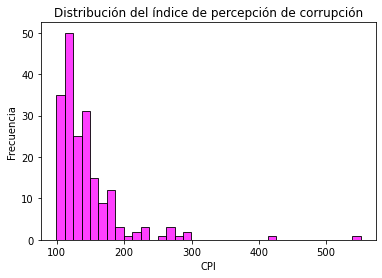

In [21]:
sns.histplot(x = "cpi",
             data = df,
             color = "magenta")

plt.xlabel("CPI")
plt.ylabel("Frecuencia")

plt.title("Distribución del índice de percepción de corrupción");

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

In [64]:
# Utilizamos las columnas "agricultural_land" y "land_area" para realizar el ejercicio, ya que no tenemos la columna "gdp" en nuestro DataFrame
resultado = df["land_area"] - df["agricultural_land"]
max_resultado = resultado.max()

pais_max_resultado = df[resultado == max_resultado]["country"].iloc[0]

print(f"El país con la mayor diferencia entre 'land_area' y 'agricultural_land' es: {pais_max_resultado}")

El país con la mayor diferencia entre 'land_area' y 'agricultural_land' es: Russia


8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

In [44]:
media = df.groupby("country")["population_labor_force_participation"].mean()

for country, i in media.items():
    print(f"El porcentaje promedio de participantes en la fuerza laboral en {country} es: {i:.2f}%")

El porcentaje promedio de participantes en la fuerza laboral en Afghanistan es: 48.90%
El porcentaje promedio de participantes en la fuerza laboral en Albania es: 55.70%
El porcentaje promedio de participantes en la fuerza laboral en Algeria es: 41.20%
El porcentaje promedio de participantes en la fuerza laboral en Andorra es: 62.45%
El porcentaje promedio de participantes en la fuerza laboral en Angola es: 77.50%
El porcentaje promedio de participantes en la fuerza laboral en Antigua and Barbuda es: 62.45%
El porcentaje promedio de participantes en la fuerza laboral en Argentina es: 61.30%
El porcentaje promedio de participantes en la fuerza laboral en Armenia es: 55.60%
El porcentaje promedio de participantes en la fuerza laboral en Australia es: 65.50%
El porcentaje promedio de participantes en la fuerza laboral en Austria es: 60.70%
El porcentaje promedio de participantes en la fuerza laboral en Azerbaijan es: 66.50%
El porcentaje promedio de participantes en la fuerza laboral en B

9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

In [48]:
variables_numericas = df.select_dtypes(include="number")

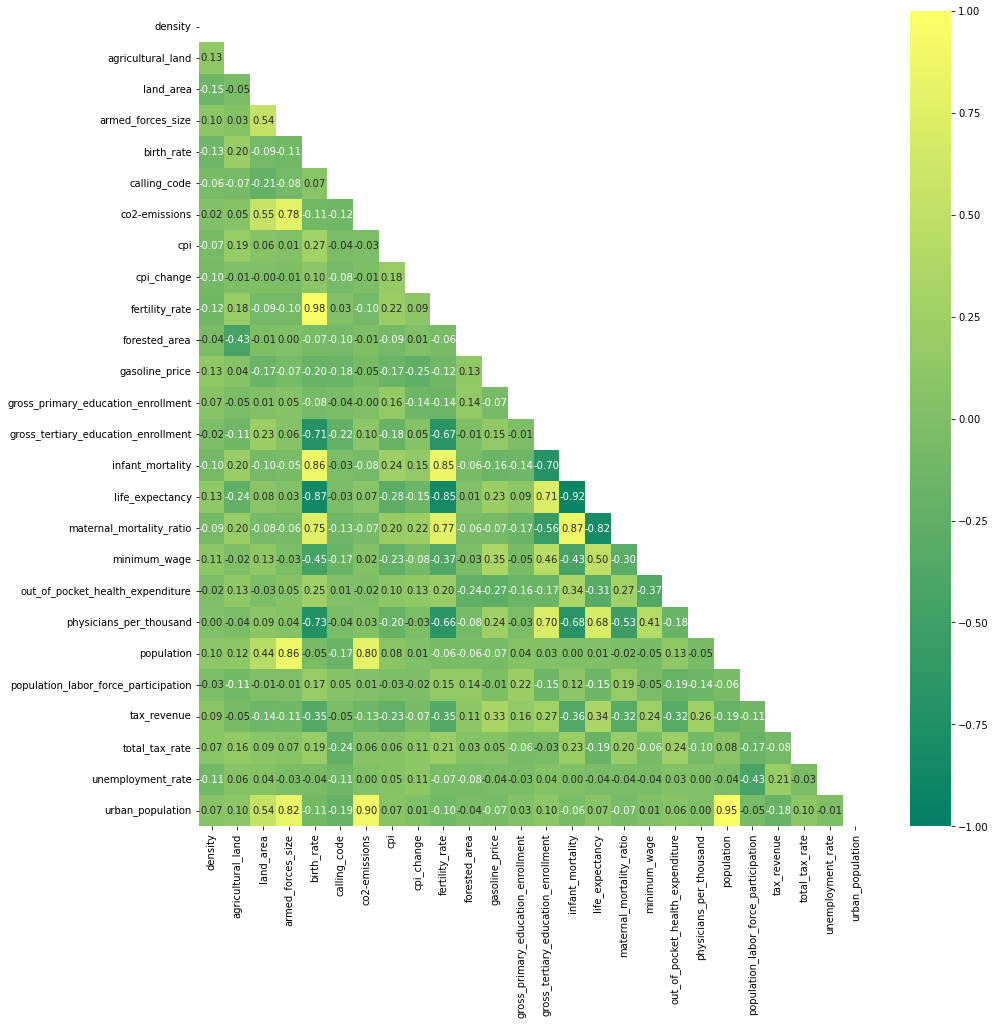

In [63]:
plt.figure(figsize=(15, 15))
mask = np.triu(np.ones_like(variables_numericas.corr(), dtype=bool))

sns.heatmap(variables_numericas.corr(),
            annot = True,
            fmt = ".2f",
            cmap = "summer",
            vmin = -1, vmax = 1,
            mask = mask);